In [ ]:
import numpy as np # for numericals
import pandas as pd # for data
from sklearn.model_selection import train_test_split, GridSearchCV # split data to train and test data; hyperparameter tuning
from sklearn.preprocessing import StandardScaler, MinMaxScaler # standardize; normalize
from sklearn.metrics import classification_report, mean_squared_error,  r2_score # for report
!pip install scikeras
from scikeras.wrappers import KerasClassifier # for classification
from scikeras.wrappers import KerasRegressor # for regression
from tensorflow.keras.models import Sequential # provide linear stack of layers to build neural network model
from tensorflow.keras.layers import Dense # adds a dense (fully connected) layer to the neural network

In [ ]:
# Upload and read data
from google.colab import drive
drive.mount("/content/drive")
path = "/content/drive/MyDrive/Loan_data_RBL_AI.xlsx"
data = pd.read_excel(path, engine="openpyxl")
data

Mounted at /content/drive


,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,45,39948,617,1,3,22,13152,48,2,2,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,38,39709,628,1,5,15,26045,48,1,1,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,47,40724,570,1,2,26,17627,36,2,2,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,58,69084,545,1,1,34,37898,96,1,1,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,37,103264,594,1,5,17,9184,36,2,1,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179141,0.070210,1,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,52,38162,582,1,2,27,18921,24,2,3,...,3180.166667,0.760896,3,6378,0.202921,0.220165,981.740412,0.384804,0,61.0
1996,39,71419,606,1,3,20,37152,60,2,3,...,5951.583333,0.492342,6,128273,0.239152,0.240005,1068.797921,0.229989,0,45.0
1997,29,17664,482,1,1,9,50927,24,2,0,...,1472.000000,0.956304,4,3199,0.284927,0.258697,2740.324923,2.051851,0,56.0
1998,38,22876,579,1,1,16,28262,108,2,2,...,1906.333333,0.758587,3,431336,0.283762,0.321012,802.398115,0.601363,0,48.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 35 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         2000 non-null   int64  
 1   AnnualIncome                2000 non-null   int64  
 2   CreditScore                 2000 non-null   int64  
 3   EmploymentStatus            2000 non-null   int64  
 4   EducationLevel              2000 non-null   int64  
 5   Experience                  2000 non-null   int64  
 6   LoanAmount                  2000 non-null   int64  
 7   LoanDuration                2000 non-null   int64  
 8   MaritalStatus               2000 non-null   int64  
 9   NumberOfDependents          2000 non-null   int64  
 10  Home3ershipStatus           2000 non-null   int64  
 11  MonthlyDebtPayments         2000 non-null   int64  
 12  CreditCardUtilizationRate   2000 non-null   float64
 13  NumberOfOpenCreditLines     2000 

In [ ]:
# Data preparation
X = data.drop(['LoanApproved', 'RiskScore'], axis=1)
y_classification = data['LoanApproved']
y_regression = data['RiskScore']

# SYnthetic Data Generation
X = np.random.rand(2000, 35) # generates a 2000x35 matrix of random numbers between 0 and 1
y_classification = np.random.randint(0, 2, 2000) # generates 2000 random integers, either 0 or 1
y_regression = np.random.rand(2000) # generates 2000 random numbers between 0 and 1

In [ ]:
# Split the data
X_train, X_test, y_class_train, y_class_test, y_reg_train, y_reg_test = train_test_split(
    X, y_classification, y_regression, test_size=0.2, random_state=42
)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define the model
def create_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='linear'))  # For classification
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
# Wrap the Keras model for GridSearchCV
classifier = KerasClassifier(model=create_model, verbose=0)

# Grid search parameters
param_grid = {
    'model__activation': ['relu', 'tanh'],
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [32, 64],
    'epochs': [10, 20]
}

# Perform grid search
grid = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(X_train_scaled, y_class_train)

# Print best parameters
print(f"Best Parameters: {grid_result.best_params_}")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best Parameters: {'batch_size': 64, 'epochs': 20, 'model__activation': 'tanh', 'model__optimizer': 'adam'}


              precision    recall  f1-score   support

           0       0.50      0.50      0.50       198
           1       0.51      0.50      0.51       202

    accuracy                           0.50       400
   macro avg       0.50      0.50      0.50       400
weighted avg       0.50      0.50      0.50       400



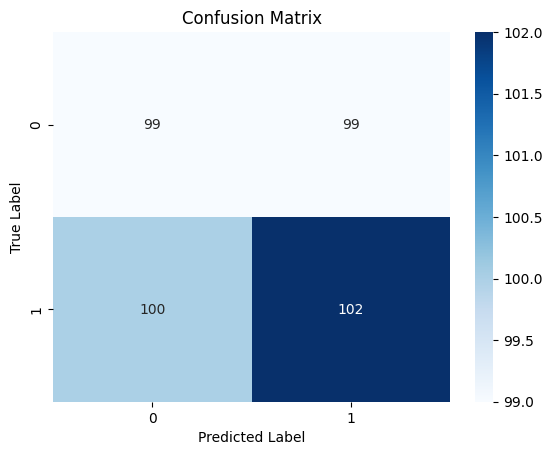

In [ ]:
# Evaluate on test data
best_model = grid_result.best_estimator_
y_pred_class = best_model.predict(X_test_scaled)
print(classification_report(y_class_test, y_pred_class))

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_class_test, y_pred_class)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("city_knn_cm1.png", bbox_inches = 'tight', dpi=300)
plt.show()

In [ ]:
# Build a regression model for risk score
def create_regression_model(optimizer='adam', activation='relu'):
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation=activation))
    model.add(Dense(32, activation=activation))
    model.add(Dense(1, activation='linear'))  # For regression
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mse'])
    return model

In [ ]:
# Train the regression model
regressor = KerasRegressor(build_fn=create_regression_model, verbose=0, epochs=20, batch_size=32)
regressor.fit(X_train_scaled, y_reg_train)
y_pred_reg = regressor.predict(X_test_scaled)
print(f"Mean Squared Error: {mean_squared_error(y_reg_test, y_pred_reg)}")

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mean Squared Error: 0.12944710876011434


Different Coding to Build Model and Predict Risk Score

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['RiskScore'])  # Ambil semua kolom kecuali
y = data['RiskScore']  # Kolom sebagai target

In [ ]:
# Bagi data2 menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalisasi dan standarisasi data2
scaler_minmax = MinMaxScaler()  # Normalisasi
scaler_standard = StandardScaler()  # Standarisasi

In [ ]:
# Fit-transform pada data2 training
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_train_standardized = scaler_standard.fit_transform(X_train_normalized)

# Transform data2 testing
X_test_normalized = scaler_minmax.transform(X_test)
X_test_standardized = scaler_standard.transform(X_test_normalized)

In [ ]:
# Tetapkan parameter ANN secara manual
optimizer = 'adam'  # Optimizer yang digunakan
neurons = 60  # Jumlah neuron di setiap lapisan
hidden_layers = 5  # Jumlah lapisan tersembunyi
batch_size = 32  # Ukuran batch
epochs = 1000  # Jumlah epoch

# Pembangunan model ANN
model = Sequential()

In [ ]:
# Lapisan input pertama
model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))

# Tambahkan lapisan tersembunyi
for _ in range(hidden_layers):
    model.add(Dense(neurons, activation='relu'))

# Lapisan output
model.add(Dense(1, activation='linear'))

# Kompilasi model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Latih model
model.fit(X_train_standardized, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

# Prediksi pada training dan test set
y_train_pred = model.predict(X_train_standardized).flatten()
y_test_pred = model.predict(X_test_standardized).flatten()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Hitung metrik untuk training dan test set
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Tampilkan hasil
print("Training Set:")
print(f"R-squared: {train_r2:.4f}")
print(f"Mean Squared Error: {train_mse:.4f}")

print("\nTest Set:")
print(f"R-squared: {test_r2:.4f}")
print(f"Mean Squared Error: {test_mse:.4f}")

Training Set:
R-squared: 0.9983
Mean Squared Error: 0.1030

Test Set:
R-squared: 0.9282
Mean Squared Error: 3.6098


In [ ]:
# Buat tabel label, prediksi, dan residu untuk test set
test_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred,
    'Residual': y_test.values - y_test_pred
})

# Buat tabel label, prediksi, dan residu untuk training set
train_results = pd.DataFrame({
    'Actual': y_train.values,
    'Predicted': y_train_pred,
    'Residual': y_train.values - y_train_pred
})

print("\nTest Set Results:")
print(test_results)

print("\nTraining Set Results:")
print(train_results)


Test Set Results:
     Actual  Predicted  Residual
0      52.0  53.014900 -1.014900
1      60.0  59.341743  0.658257
2      53.0  55.297260 -2.297260
3      48.0  49.586281 -1.586281
4      54.0  55.115295 -1.115295
..      ...        ...       ...
195    61.0  61.401745 -0.401745
196    56.0  53.917744  2.082256
197    58.0  61.138729 -3.138729
198    53.0  54.910786 -1.910786
199    63.0  64.919464 -1.919464

[200 rows x 3 columns]

Training Set Results:
      Actual  Predicted  Residual
0       58.0  58.538189 -0.538189
1       41.6  41.628590 -0.028590
2       40.8  40.928497 -0.128497
3       47.0  47.197540 -0.197540
4       53.0  53.526817 -0.526817
...      ...        ...       ...
1795    64.0  64.103462 -0.103462
1796    44.0  44.204632 -0.204632
1797    58.0  58.434772 -0.434772
1798    53.0  52.850208  0.149792
1799    37.6  37.766209 -0.166209

[1800 rows x 3 columns]


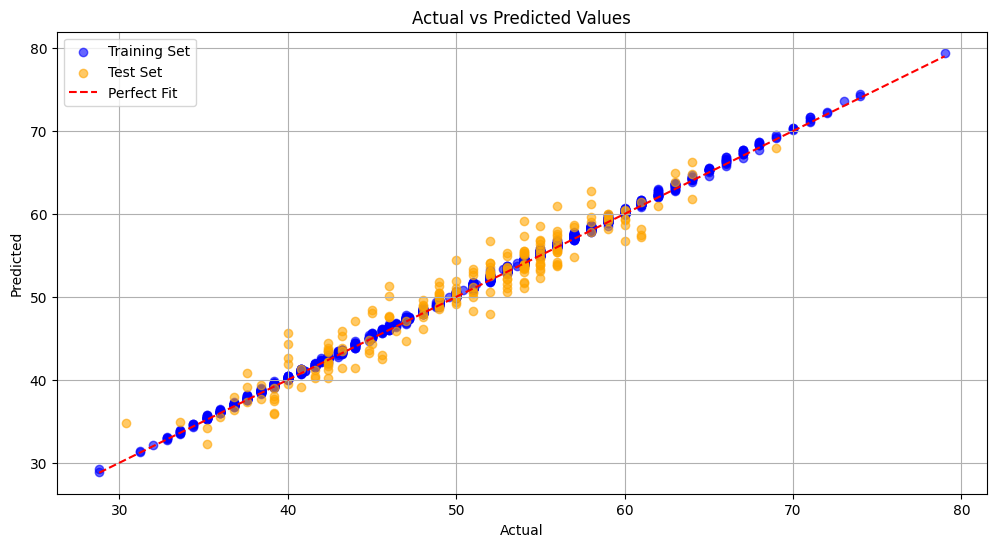

In [ ]:
import matplotlib.pyplot as plt
# Plot Eksperimen vs Prediksi untuk training set
plt.figure(figsize=(12, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6, label='Training Set')
plt.scatter(y_test, y_test_pred, color='orange', alpha=0.6, label='Test Set')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--', label='Perfect Fit')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid()
plt.show()

Different Coding to Build Model and Predict Loan Approval

In [ ]:
# Pisahkan fitur (X) dan target (y)
X = data.drop(columns=['LoanApproved'])  # Ambil semua kolom kecuali ... sebagai fitur
y = data['LoanApproved']  # Kolom sebagai target

In [ ]:
# Bagi data2 menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Normalisasi dan standarisasi data2
scaler_minmax = MinMaxScaler()  # Normalisasi
scaler_standard = StandardScaler()  # Standarisasi

In [ ]:
# Fit-transform pada data2 training
X_train_normalized = scaler_minmax.fit_transform(X_train)
X_train_standardized = scaler_standard.fit_transform(X_train_normalized)

# Transform data2 testing
X_test_normalized = scaler_minmax.transform(X_test)
X_test_standardized = scaler_standard.transform(X_test_normalized)

In [ ]:
# Tetapkan parameter ANN secara manual
optimizer = 'adam'  # Optimizer yang digunakan
neurons = 60  # Jumlah neuron di setiap lapisan
hidden_layers = 5  # Jumlah lapisan tersembunyi
batch_size = 32  # Ukuran batch
epochs = 1000  # Jumlah epoch

# Pembangunan model ANN
model = Sequential()

In [ ]:
# Lapisan input pertama
model.add(Dense(neurons, input_dim=X_train.shape[1], activation='relu'))

# Tambahkan lapisan tersembunyi
for _ in range(hidden_layers):
    model.add(Dense(neurons, activation='relu'))

# Lapisan output
model.add(Dense(1, activation='sigmoid'))

# Kompilasi model
model.compile(optimizer=optimizer, loss='mean_squared_error')

# Latih model
model.fit(X_train_standardized, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

# Prediksi pada training dan test set
y_train_pred = model.predict(X_train_standardized).flatten()
y_test_pred = model.predict(X_test_standardized).flatten()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


57/57 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
# Hitung metrik untuk training dan test set
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

# Tampilkan hasil
print("Training Set:")
print(f"R-squared: {train_r2:.4f}")
print(f"Mean Squared Error: {train_mse:.4f}")

print("\nTest Set:")
print(f"R-squared: {test_r2:.4f}")
print(f"Mean Squared Error: {test_mse:.4f}")

Training Set:
R-squared: 1.0000
Mean Squared Error: 0.0000

Test Set:
R-squared: 0.9729
Mean Squared Error: 0.0052


In [ ]:
# Buat tabel label, prediksi, dan residu untuk test set
test_results = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_test_pred,
    'Residual': y_test.values - y_test_pred
})

# Buat tabel label, prediksi, dan residu untuk training set
train_results = pd.DataFrame({
    'Actual': y_train.values,
    'Predicted': y_train_pred,
    'Residual': y_train.values - y_train_pred
})

print("\nTest Set Results:")
print(test_results)

print("\nTraining Set Results:")
print(train_results)


Test Set Results:
     Actual     Predicted      Residual
0         0  3.475051e-08 -3.475051e-08
1         0  7.521998e-11 -7.521998e-11
2         0  1.336086e-09 -1.336086e-09
3         0  2.337606e-10 -2.337606e-10
4         0  1.154869e-09 -1.154869e-09
..      ...           ...           ...
195       0  4.003482e-13 -4.003482e-13
196       0  4.548523e-12 -4.548523e-12
197       0  1.084376e-09 -1.084376e-09
198       0  5.893322e-13 -5.893322e-13
199       0  5.106062e-11 -5.106062e-11

[200 rows x 3 columns]

Training Set Results:
      Actual     Predicted      Residual
0          0  1.127229e-12 -1.127229e-12
1          1  1.000000e+00  0.000000e+00
2          1  1.000000e+00  0.000000e+00
3          0  7.524584e-07 -7.524584e-07
4          0  7.693277e-10 -7.693277e-10
...      ...           ...           ...
1795       0  7.310037e-11 -7.310037e-11
1796       1  1.000000e+00  0.000000e+00
1797       0  4.198895e-09 -4.198895e-09
1798       0  3.739100e-13 -3.739100e-13
179

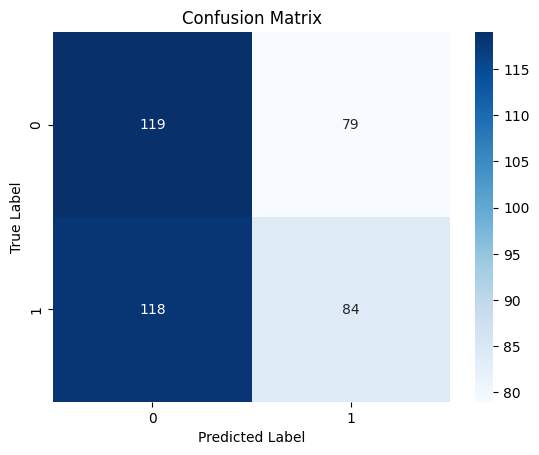

In [ ]:
# Evaluate on test data
best_model = grid_result.best_estimator_
y_pred_class = best_model.predict(X_test_scaled)

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_class_test, y_pred_class)

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.savefig("city_knn_cm1.png", bbox_inches = 'tight', dpi=300)
plt.show()